In [12]:
from pymc import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
p_b = Uniform('p_b', 0.0, 1.0)

In [3]:
N_b = Binomial('N_b', n=4138349, p=p_b, value=2118982, observed=True)


In [4]:
m = Model([p_b, N_b])


In [5]:
p_b.value = 0.5

In [6]:
mc = MCMC(m)

In [7]:
mc.sample(iter=50000,burn=10000)

 [-----------------100%-----------------] 50000 of 50000 complete in 2.4 sec

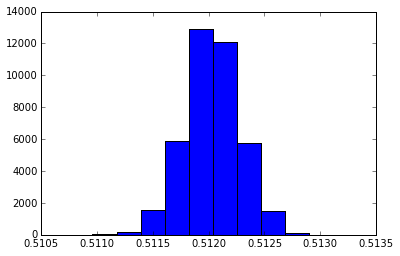

In [17]:
plt.hist(p_b.trace());

In [19]:
from pymc import *
p_b = Uniform('p_b', 0.0, 1.0)
e_N = Normal('e_N', 0.0, 1.0/(10000.0)**2)
e_N_b = Normal('e_N_b', 0.0, 1.0/(10000.0)**2)
N = 4138349

@potential
def likelihood(N_b=251527, e_N_b=e_N_b, N=241945+251527, e_N=e_N, p=p_b):
    return binomial_like(N_b + e_N_b, N + e_N, p)
mc = MCMC([p_b, N, N_b, likelihood])

In [21]:
mc.sample(iter=50000,burn=10000)

 [-----------------100%-----------------] 50000 of 50000 complete in 2.8 sec

Plotting p_b


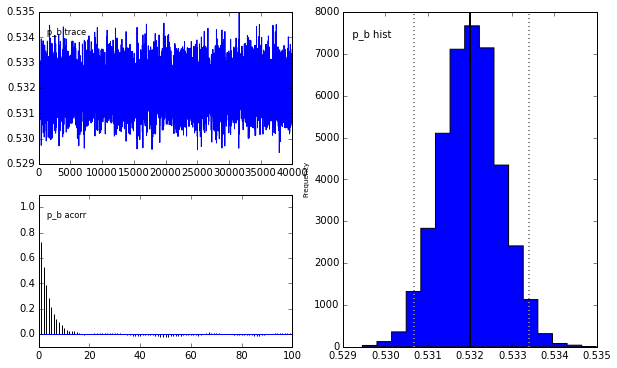

In [23]:
Matplot.plot(mc) 